# 劣勾配法による最適化

参考: 
* [Subgradient Method](https://web.stanford.edu/class/ee392o/subgrad_method.pdf)
* [Convex Analysis](https://convexoptimization.com/TOOLS/CARock.pdf#page=221.12)

## 凸での劣微分

まず劣微分についておさらいしておきましょう．
劣微分は微分不可能な関数に対しても拡張された微分の概念です．特に凸関数に対して劣微分が定義されます（凸じゃない関数でも考えることはできますが，あまり意味のある量になりません．）

凸関数$f$の点$x \in \mathbb{R}^d$における劣微分とは，任意の$z \in \mathbb{R}^d$に対して，次の条件を満たす$x^*$の集合です．

$$
f(z) \geq f(x)+\left\langle x^*, z-x\right\rangle, \quad \forall z
$$

劣微分は集合であることに注意しましょう．
この集合の要素を劣勾配といいます．

---

**直感** $f$が点$x$で有限な場合を考えると，線形関数$h(z)=f(x)+\left\langle x^*, z-x\right\rangle$が$\operatorname{epi}f$の$x, f(x)$での接平面になっていることを意味します．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

x = np.linspace(-2.0, 2.0, 11)
y = np.abs(x)

fig = plt.figure()
camera = Camera(fig)


grad = np.linspace(-1.0, 1.0, 11)
for g in grad:
    plt.plot(x, y, color="blue")
    plt.scatter(x[5], y[5], s=30, color="red")
    plt.plot(x, g * x, color="green")
    camera.snap()

animation = camera.animate()
animation.save("./figs/subgradient.gif")
plt.close()

次のように，$f(x)=|x|$の$x=0$での劣微分は$[-1, 1]$の集合になります．
![subgrad](./figs/subgradient.gif)

## フレシェ劣微分とClarke劣微分

参考：
* [ON FŔECHET SUBDIFFERENTIALS](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=3308ca37be4de33fb7f83344ae33afb0b28592ab)
* [Fréchet subdifferential for weakly convex functions on Hilbert spaces](https://math.stackexchange.com/questions/4946578/fr%C3%A9chet-subdifferential-for-weakly-convex-functions-on-hilbert-spaces)これも参考になるよ

### フレシェ劣微分（Regular劣微分とも呼ばれる）

凸関数についての普通の劣微分は，凸関数$f$を下から支えるような接平面で定義されます．
これは一般的な非凸関数や，さらに一般のバナッハ空間上の関数に対しては定義できません．

そこで，フレシェ劣微分は別の劣微分の概念を提供します．点$x$において，あるベクトル$g$がフレシェ劣微分に入る条件は，
$$
f(x+h)-f(x) \geq\langle g, h\rangle+o(\|h\|) \quad(h \rightarrow 0)
$$
の「近似」の形で表現されます．
すなわち，普通の凸関数と違って，$x$周りで下から支える接平面を，誤差$\rangle+o(\|h\|) \quad(h \rightarrow 0)$を許して考えています．

上で定義した凸関数に対する劣微分をRockafellar劣微分と呼ぶことにしましょう（もしくは凸劣微分と呼ばれたりします）．
凸関数においては，フレシェ劣微分とRockafellar劣微分は一致します
[ON FŔECHET SUBDIFFERENTIALS](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=3308ca37be4de33fb7f83344ae33afb0b28592ab)のProposition 1.2参照．
よって，凸関数なら大体の場合でフレシェ微分が存在します（下で見ますが，大体の凸関数は凸劣微分が存在します）．


---

**フレシェ劣微分が存在しないとき**

フレシェ劣微分は凸でない場合に空になることがあります．例えば，
$f(x) = -|x|$の$x=0$での劣微分を考えてみましょう．

**$h>0$のとき**
$x=0$での劣微分の条件は，任意の小さい$h> 0$に対して，
$f(h) - f(0) = -x \geq gx + o(x)$を満たす$g$が存在することです．
両辺を$x$で割り，$o(x) / x \to 0$を使うと，$g \leq -1$が必要です．

**$h<0$のとき**
任意の小さい$h< 0$に対して，
$f(h) - f(0) = x \geq gx + o(x)$を満たす$g$が存在しないといけないので，
同様に，$g \geq 1$が必要です．

つまり，$h > 0$と$h<0$での劣微分の条件を同時に満たす$g$が存在しないので，空集合になります．


**直感**：Weakly convexな関数では$x^2$を追加すると凸性が発生します．ここで，$x^2$は$x=0$付近で勾配が０なので，勾配が急に発生する$-|x|$のような関数を考えると，$x\approx 0$で勾配が$-|x|$に勝てず，凸関数にできません．

### Clarke劣微分

* [CLARKE SUBGRADIENTS OF STRATIFIABLE FUNCTIONS](https://people.orie.cornell.edu/aslewis/publications/07-clarke.pdf)

TODO: 書く

## 劣勾配の性質など

$\partial f(x)$はclosedな凸集合です．定義から，$f(z) \geq f(x)+\left\langle x^*, z-x\right\rangle, \quad \forall z$なので，線形不等式で表せるから？

### 劣微分不可能な例

次の関数は劣微分不可能な点があります：
$$
f(x)=\left\{\begin{array}{l}
-\sqrt{1-|x|^2} \quad \text { if } \quad|x| \leq 1 \\
+\infty \quad \text { otherwise }
\end{array}\right.
$$

$|x| < 1$では劣微分可能ですが，$|x| \geq 1$では劣微分が空集合になります．
実際，$|z| < 1$ なる$z$について考えてみると，
$$\underbrace{f(z)}_{< 0} \geq \underbrace{f(1)}_{=0}+\left\langle x^*, \underbrace{z-1}_{< 0}\right\rangle, \quad \forall |z| < 1$$
であり，特に$z \to 1$なる$z$にもこの不等式が成立してないといけないので，$x^*$は無限に飛んでいきます．よって，これを満たす有限な$x^*$が存在しないので，これは$|x|=1$で微分不可能です．
**$|x|=1$は$x \in \operatorname{dom} f$に入ってるのに劣微分不可能であることに注意しましょう．**
一般に，$\operatorname{dom}$の境界では良くない挙動になることがあります．


/tmp/ipykernel_5170/1584914781.py:5: RuntimeWarning: invalid value encountered in sqrt
  f = np.where(np.abs(x) <= 1, -np.sqrt(1 - np.abs(x)**2), 3)


(-2.0, 2.0)

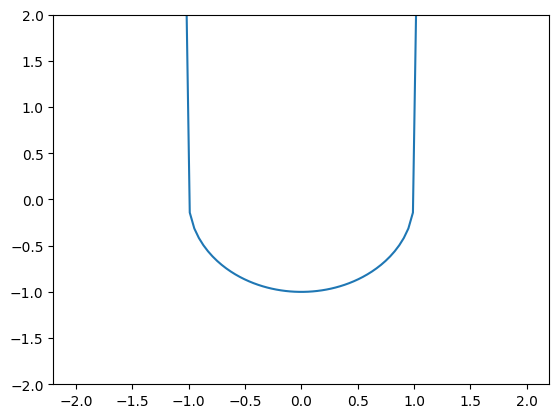

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.0, 2.0, 100)
f = np.where(np.abs(x) <= 1, -np.sqrt(1 - np.abs(x)**2), 3)

plt.plot(x, f)
plt.ylim(-2, 2)

### Normal Coneとの関係

[CVX_convex_sets.ipynb](CVX_convex_sets.ipynb)に書きました．

### 方向微分との関係（TODO）

### 劣勾配の存在

* [Convex Analysis](https://convexoptimization.com/TOOLS/CARock.pdf)の定理23.3

$x$を，凸関数$f$が有限な点とします．
* $f$が$x$で劣微分可能ならば，$f$はproperです．
* $f$が$x$で劣微分不可能ならば，次の方向微分を満たす$y$が必ず存在します：$f^{\prime}(x ; y)=-f^{\prime}(x,-y)=-\infty$．

* [Convex Analysis](https://convexoptimization.com/TOOLS/CARock.pdf)の定理23.4

$f$をproperな凸関数とします．
* $x \notin \operatorname{dom}f$のとき，$\partial f(x)$は空集合です．
* $x \in \operatorname{ri}(\operatorname{dom} f)$のとき，$\partial f(x)$は空ではなく，$f'(x;y)$は閉じたproperな$y$についての関数で，$f^{\prime}(x ; y)=\sup \left\{\left\langle x^*, y\right\rangle \mid x^* \in \partial f(x)\right\}=\delta^*(y \mid \partial f(x))$です．
* $\partial f(x)$が空でないのは，iffで$x \in \operatorname{int}(\operatorname{dom} f)$のときだけです．このとき，$f'(x;y)$は任意の$y$で有限です．

結局，properな凸関数$f$は$\operatorname{ri}(\operatorname{dom} f)$で常に劣微分可能です．直感的な説明は[Convex Analysis 217ページ](https://convexoptimization.com/TOOLS/CARock.pdf)にあります．

特殊ケースは$f$が有限な凸関数である場合ですね．これは任意の$x$で劣微分可能です．

### 劣勾配と凸共役の関係

* [Convex Analysis](https://convexoptimization.com/TOOLS/CARock.pdf)の定理23.5

任意のproperな凸関数$f$と，任意のベクトル$x$について，ベクトル$x^*$についての以下の主張は等価です：
1. $x^* \in \partial f(x)$
2. $\langle z, x^*\rangle - f(z)$が$z=x$でsupremumを取る
3. $f(x)+f^*\left(x^*\right) \leq\left\langle x, x^*\right\rangle$
4. $f(x)+f^*\left(x^*\right)=\left\langle x, x^*\right\rangle$

さらに$f$がlower-semi continuousなとき（$(\operatorname{cl} f)(x) = f(x)$のとき），次が言えます：
1. $x \in \partial f^*(x^*)$
2. $\left\langle x, z^*\right\rangle-f^*\left(z^*\right)$は$z^*=x^*$でsupremumを取る
3. $x^* \in \partial(\operatorname{cl} f)(x)$

Lower semi-continuousとclosureについては7章を読みましょう．

## 劣勾配法

$f: \mathbb{R}^n\to \mathbb{R}$を凸関数とします．劣勾配法は次の更新を繰り返すことで$f$を最小化することを考えます．

$$x^{(k+1)}=x^{(k)} - \alpha_k g^{(k)}$$

ここで，$x^{(k)}$は$k$回目のイテレーションでの値，$g^{(k)}$は$x^{(k)}$での劣勾配，そして$\alpha_k$はステップサイズです．
劣勾配法は凸関数$f$が微分可能であれば，単純な勾配法と同じです．

劣勾配法では次のように過去の最小の値を保持しておくのが一般的です：

$$
f_{\text {best }}^{(k)}=\min \left\{f_{\text {best }}^{(k-1)}, f\left(x^{(k)}\right)\right\}
$$
このとき，
$$
f_{\text {best }}^{(k)}=\min \left\{f\left(x^{(1)}\right), \ldots, f\left(x^{(k)}\right)\right\}
$$
が成り立ちます．これは単調減少であることに注意しましょう．

$f^{\star}=\inf _x f(x)$を最適解とすると，次の結果が得られます．

* $\alpha_k$が定数の時：劣勾配法は$\lim _{k \rightarrow \infty} f_{\text {best }}^{(k)}-f^{\star}<\epsilon$を満たす解に収束する．（$f$が微分可能なときは，十分小さいステップサイズなら最適解に収束します．）
* $\sum_{k=1}^{\infty} \alpha_k^2<\infty, \quad \sum_{k=1}^{\infty} \alpha_k=\infty$を満たす時：$\lim _{k \rightarrow \infty} f\left(x^{(k)}\right)=f^{\star}$


### 収束の証明

$f$の最小値$x^*$が存在するとします．また，劣勾配が$\left\|g^{(k)}\right\|_2 \leq G$でバウンドされているとします．これは例えば$|f(u)-f(v)| \leq G\|u-v\|_2$のようなLipschitz条件で成立します．

早速劣勾配の証明を見ていきましょう．まず，次が成立します：

$$
\begin{aligned}
\left\|x^{(k+1)}-x^{\star}\right\|_2^2 & =\left\|x^{(k)}-\alpha_k g^{(k)}-x^{\star}\right\|_2^2 \\
& =\left\|x^{(k)}-x^{\star}\right\|_2^2-2 \alpha_k g^{(k) T}\left(x^{(k)}-x^{\star}\right)+\alpha_k^2\left\|g^{(k)}\right\|_2^2 \\
& \leq\left\|x^{(k)}-x^{\star}\right\|_2^2-2 \alpha_k\left(f\left(x^{(k)}\right)-f^{\star}\right)+\alpha_k^2\left\|g^{(k)}\right\|_2^2,
\end{aligned}
$$

最後の不等式では劣勾配の定義$f\left(x^{\star}\right) \geq f\left(x^{(k)}\right)+g^{(k) T}\left(x^{\star}-x^{(k)}\right)$を使っています．
この不等式を再帰的に適用すると，

$$
\left\|x^{(k+1)}-x^{\star}\right\|_2^2 \leq\left\|x^{(1)}-x^{\star}\right\|_2^2-2 \sum_{i=1}^k \alpha_i\left(f\left(x^{(i)}\right)-f^{\star}\right)+\sum_{i=1}^k \alpha_i^2\left\|g^{(i)}\right\|_2^2
$$

$\left\|x^{(k+1)}-x^{\star}\right\|_2^2 \geq 0$より，

$$
2 \sum_{i=1}^k \alpha_i\left(f\left(x^{(i)}\right)-f^{\star}\right) \leq\left\|x^{(1)}-x^{\star}\right\|_2^2+\sum_{i=1}^k \alpha_i^2\left\|g^{(i)}\right\|_2^2
$$

が成り立ちます．また，

$$
\sum_{i=1}^k \alpha_i\left(f\left(x^{(i)}\right)-f^{\star}\right) \geq\left(\sum_{i=1}^k \alpha_i\right) \min _{i=1, \ldots, k}\left(f\left(x^{(i)}\right)-f^{\star}\right)
$$

なので，二つを合体させると，

$$
f_{\text {best }}^{(k)}-f^{\star}=\min _{i=1, \ldots, k} f\left(x^{(i)}\right)-f^{\star} \leq \frac{\left\|x^{(1)}-x^{\star}\right\|_2^2+\sum_{i=1}^k \alpha_i^2\left\|g^{(i)}\right\|_2^2}{2 \sum_{i=1}^k \alpha_i}
$$

が成り立ちます．最後に仮定より劣勾配は$G$でバウンドされているので，

$$
f_{\text {best }}^{(k)}-f^{\star}=\min _{i=1, \ldots, k} f\left(x^{(i)}\right)-f^{\star} \leq \frac{\left\|x^{(1)}-x^{\star}\right\|_2^2+G^2 \sum_{i=1}^k \alpha_i^2}{2 \sum_{i=1}^k \alpha_i} .
$$

を得ます．$x^*$が$f$の任意の最小値であるとを考えると，$\operatorname{dist}\left(x^{(1)}, X^{\star}\right)$を$x^{(1)}$から最小値の集合までのユークリッド距離とすれば，

$$
f_{\text {best }}^{(k)}-f^{\star} \leq \frac{\operatorname{dist}\left(x^{(1)}, X^{\star}\right)^2+G^2 \sum_{i=1}^k \alpha_i^2}{2 \sum_{i=1}^k \alpha_i}
$$

と一般化することができます．

### $\alpha_k$が定数のとき

$\alpha_k=h$のときを考えましょう．このとき，

$$
f_{\text {best }}^{(k)}-f^{\star} \leq \frac{\operatorname{dist}\left(x^{(1)}, X^{\star}\right)^2+G^2 h^2 h}{2 h k}
$$

です．これより，右辺が$k \rightarrow \infty$で$G^2 h / 2$に収束することがわかります．

### $\|\alpha\|_2^2=\sum_{k=1}^{\infty} \alpha_k^2<\infty, \quad \sum_{k=1}^{\infty} \alpha_k=\infty$のとき

$$
f_{\text {best }}^{(k)}-f^{\star} \leq \frac{\operatorname{dist}\left(x^{(1)}, X^{\star}\right)^2+G^2\|\alpha\|_2^2}{2 \sum_{i=1}^k \alpha_i}
$$

なので，右辺は$0$に収束します．

## 射影劣勾配法

射影劣勾配法では次の問題を扱います．

$$
\begin{array}{ll}
\operatorname{minimize} & f(x) \\
\text { subject to } & x \in \mathcal{C}
\end{array}
$$

ここで，$C$は凸集合です．射影劣勾配法は次の更新を行います：

$$
x^{(k+1)}=P\left(x^{(k)}-\alpha_k g^{(k)}\right)
$$

ここで，$P$は$C$に対する（ユークリッド）射影です．
これも通常の劣勾配法のような収束が保証できます．

$z^{(k+1)}=x^{(k)}-\alpha_k g^{(k)}$とします．劣勾配法と同じ証明をして，

$$
\begin{aligned}
\left\|z^{(k+1)}-x^{\star}\right\|_2^2 & =\left\|x^{(k)}-\alpha_k g^{(k)}-x^{\star}\right\|_2^2 \\
& =\left\|x^{(k)}-x^{\star}\right\|_2^2-2 \alpha_k g^{(k) T}\left(x^{(k)}-x^{\star}\right)+\alpha_k^2\left\|g^{(k)}\right\|_2^2 \\
& \leq\left\|x^{(k)}-x^{\star}\right\|_2^2-2 \alpha_k\left(f\left(x^{(k)}\right)-f^{\star}\right)+\alpha_k^2\left\|g^{(k)}\right\|_2^2 .
\end{aligned}
$$

が成り立ちます．ここで，

$$
\left\|x^{(k+1)}-x^{\star}\right\|_2=\left\|P\left(z^{(k+1)}\right)-x^{\star}\right\|_2 \leq\left\|z^{(k+1)}-x^{\star}\right\|_2,
$$

であることに注意しましょう．つまり，$P$によって$C$に射影されると，$C$のどの点に対しても以前よりも近くなるので，最適値にも近づきます．
よって，

$$
\left\|x^{(k+1)}-x^{\star}\right\|_2^2 \leq\left\|x^{(k)}-x^{\star}\right\|_2^2-2 \alpha_k\left(f\left(x^{(k)}\right)-f^{\star}\right)+\alpha_k^2\left\|g^{(k)}\right\|_2^2,
$$

が成り立ちます．後は通常の劣勾配法と同じです．